Original Data:
   distance_from_center  num_of_reviews
0                   1.9          4667.0
1                   1.5          3243.0
2                   6.9           534.0
3                   1.4          2484.0
4                   1.9          2028.0

Standard Scaled Data:
   distance_from_center  num_of_reviews
0             -0.399995        0.438408
1             -0.622470        0.043063
2              2.380950       -0.709037
3             -0.678089       -0.167658
4             -0.399995       -0.294258
Test Set Results:
     K  Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  \
0    1        3.722287e+05               610.105484           369.357911   
1    3        3.240385e+05               569.243838           378.008242   
2    5        3.444194e+05               586.872550           403.988341   
3   10        4.232167e+05               650.551047           463.270437   
4   15        4.894204e+05               699.585862           505.606587   
5   20  

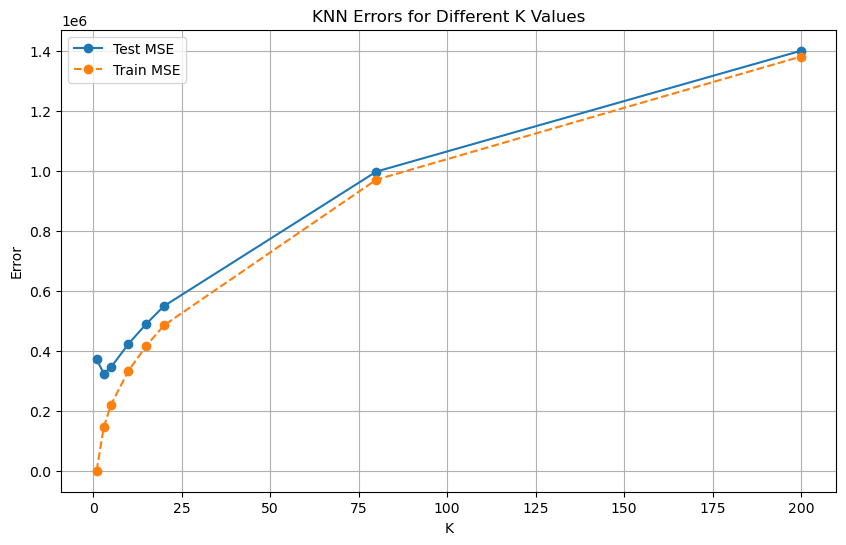

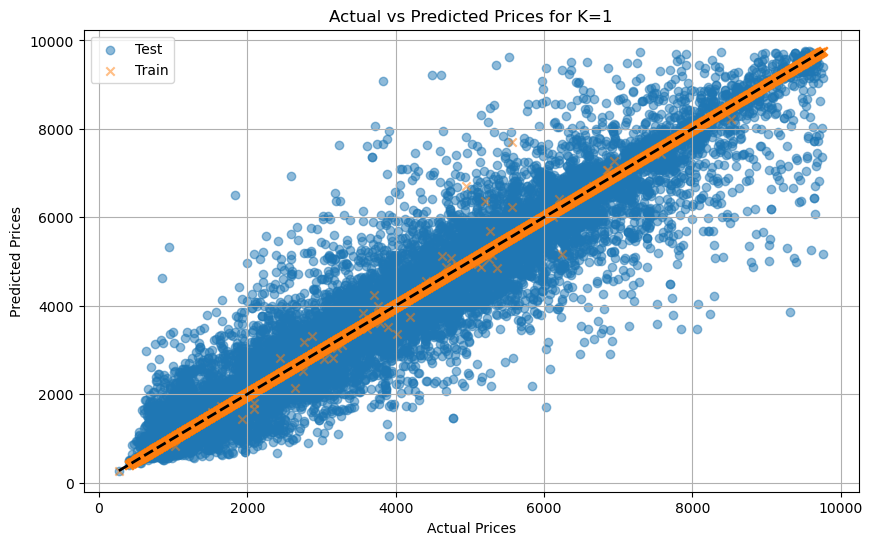

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


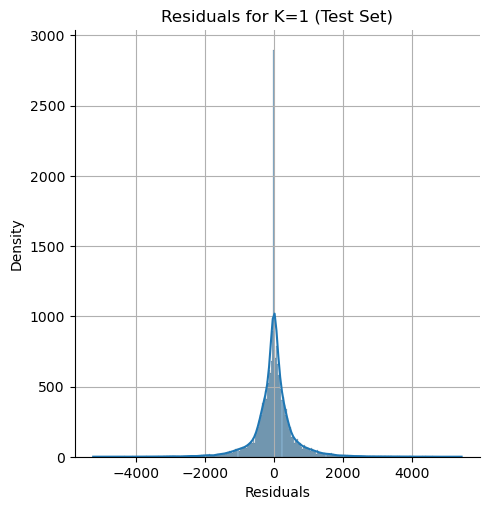

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


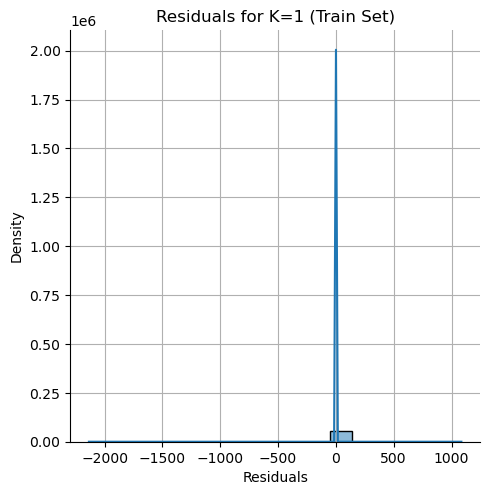

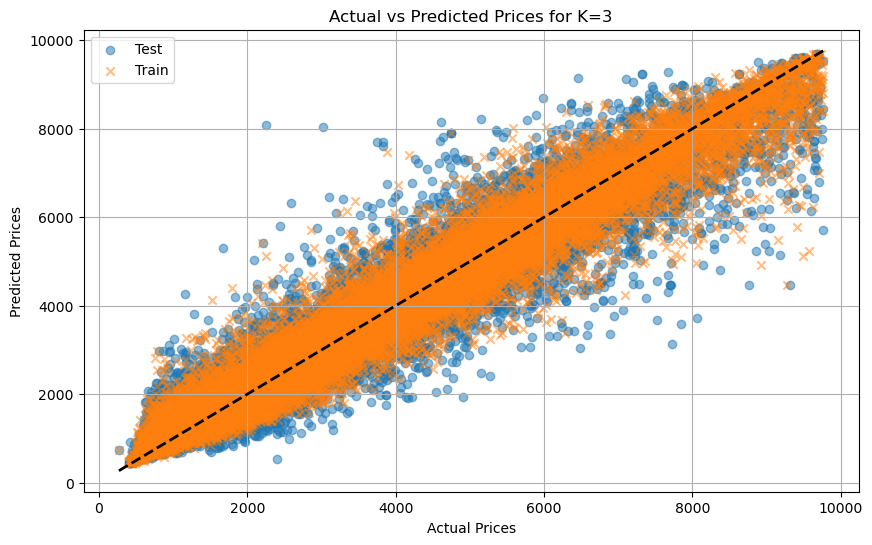

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


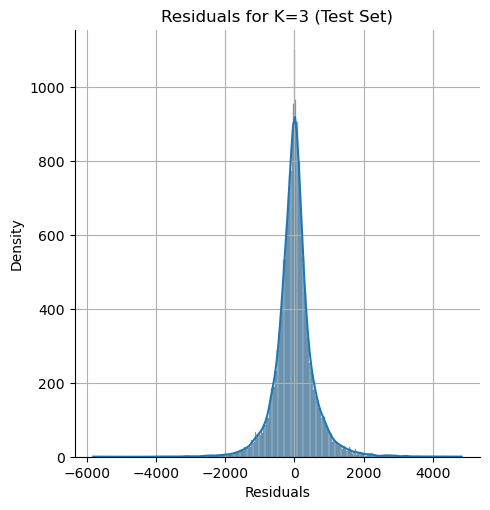

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


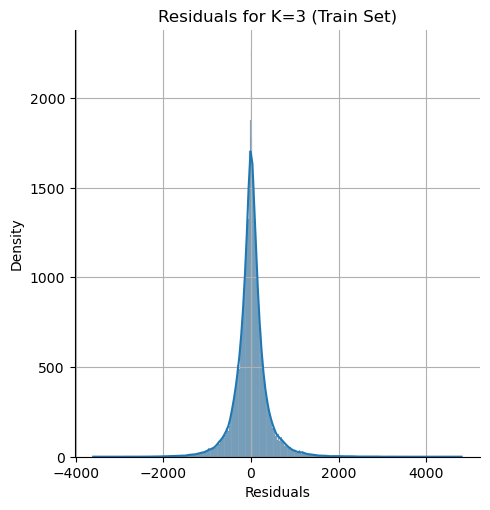

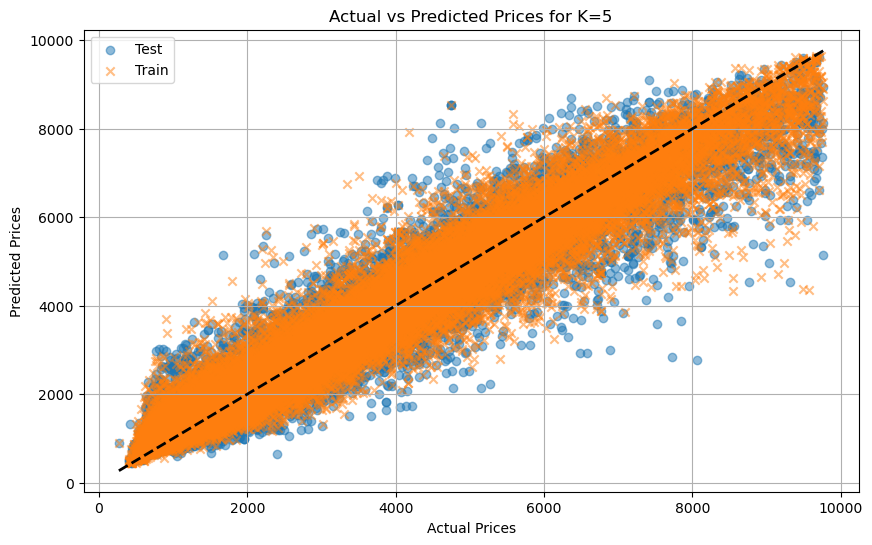

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


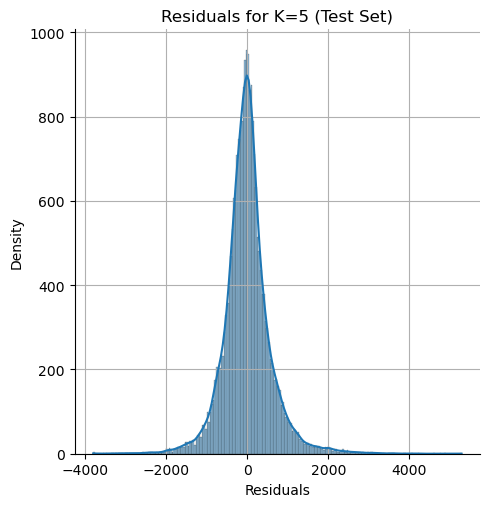

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


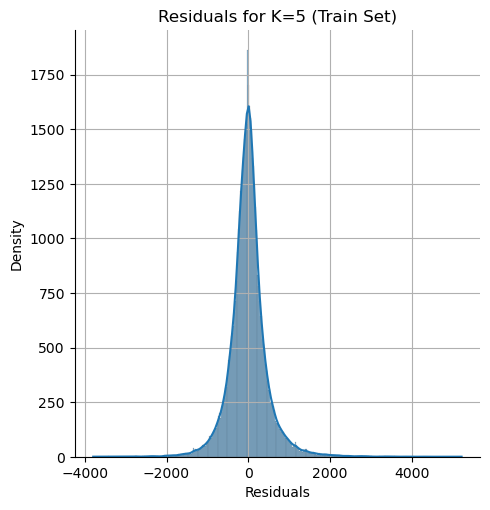

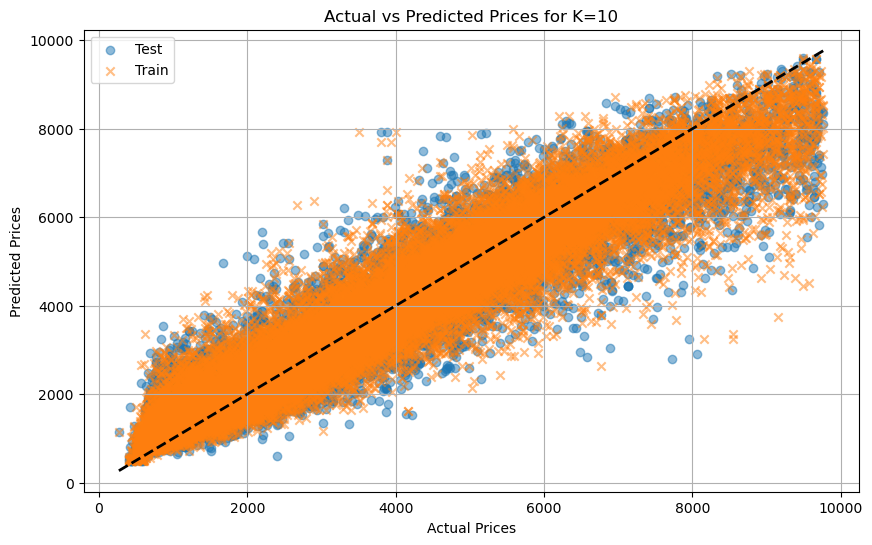

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


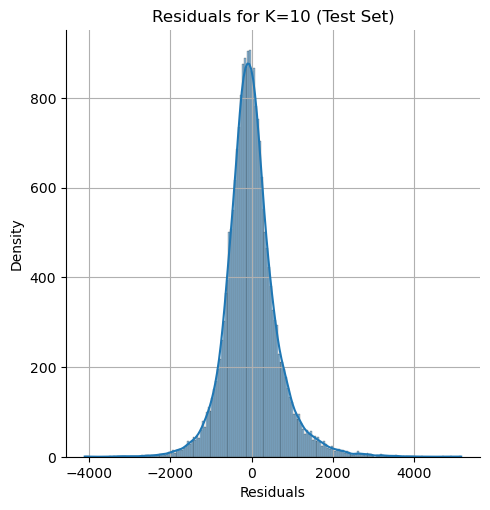

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


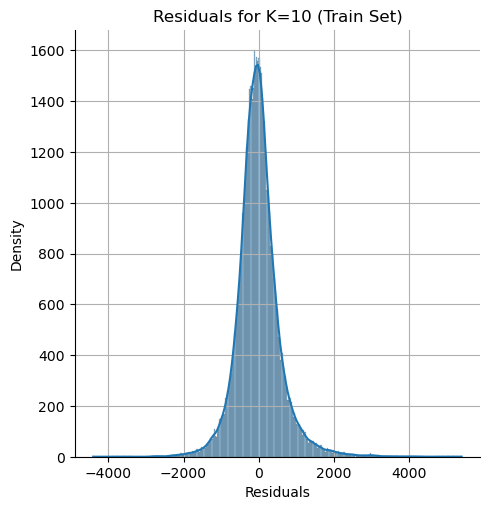

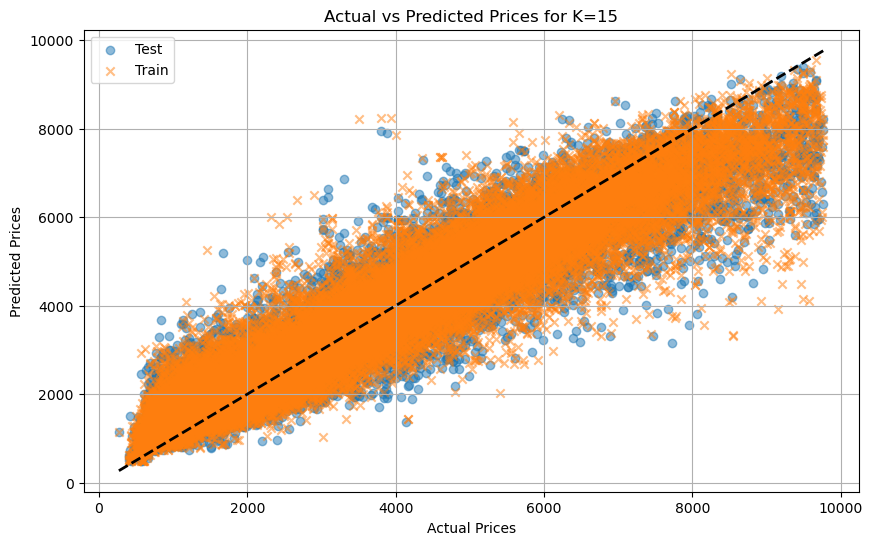

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


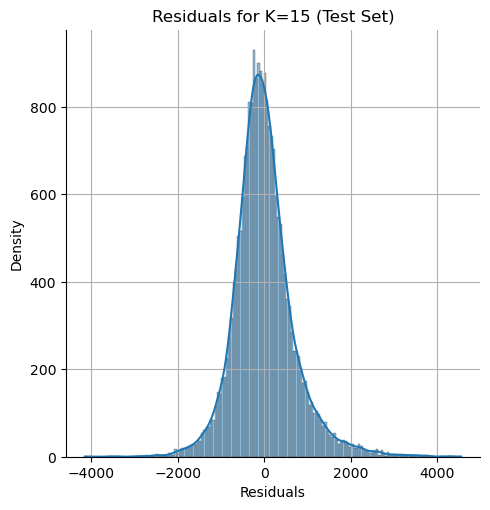

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


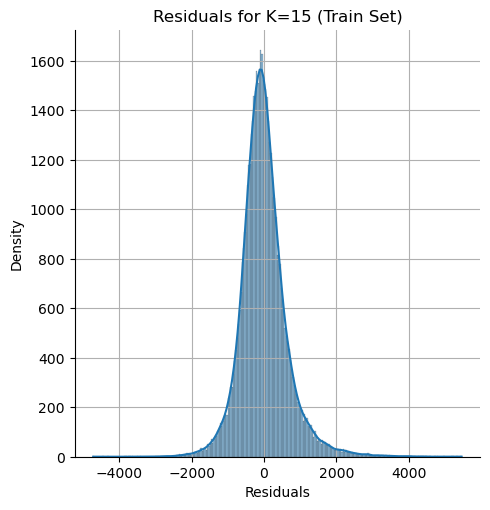

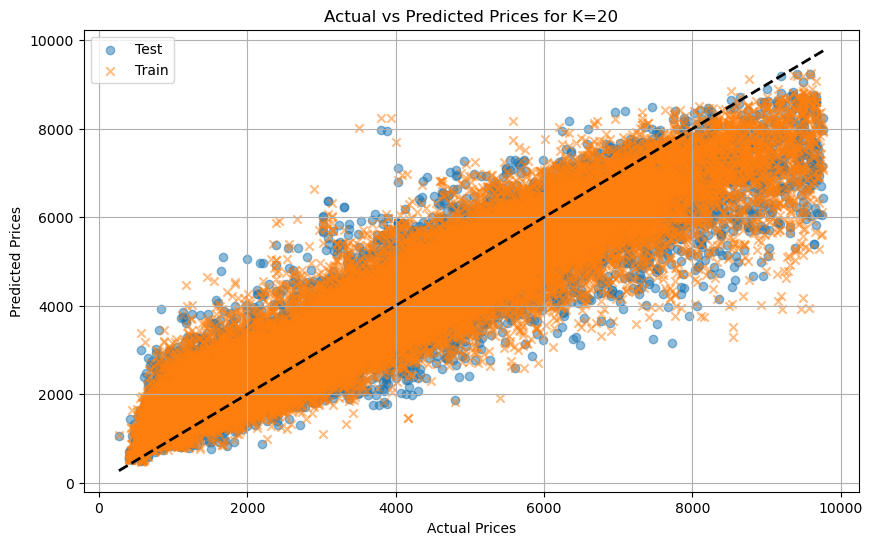

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


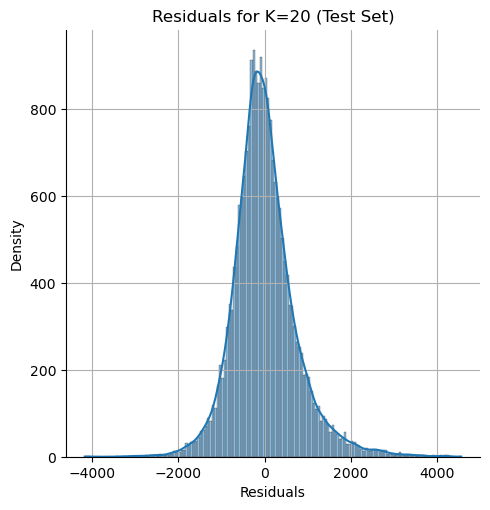

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


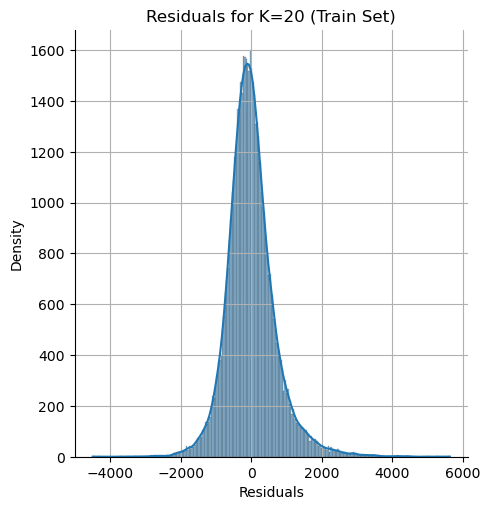

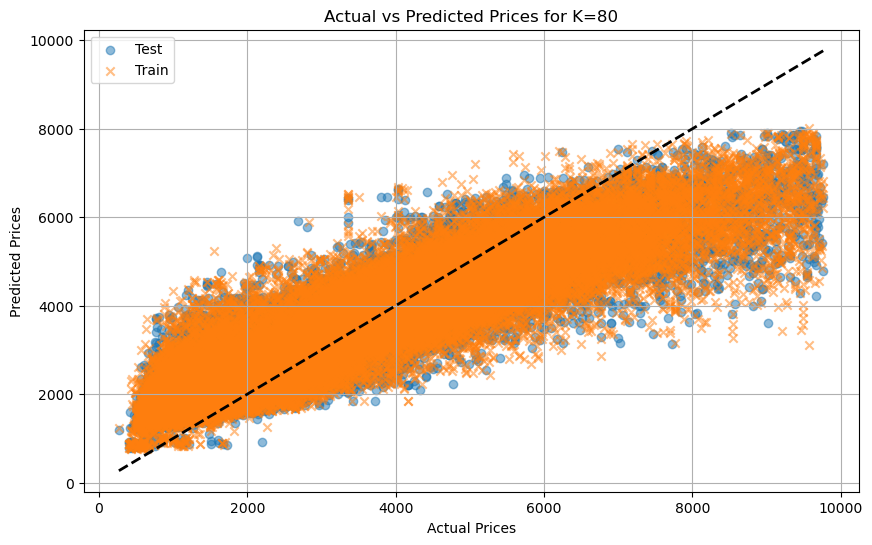

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


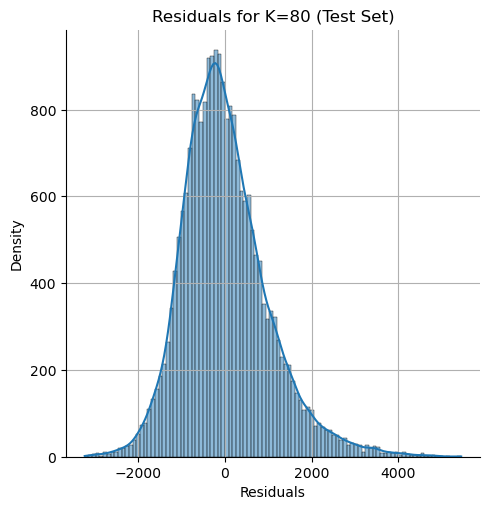

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


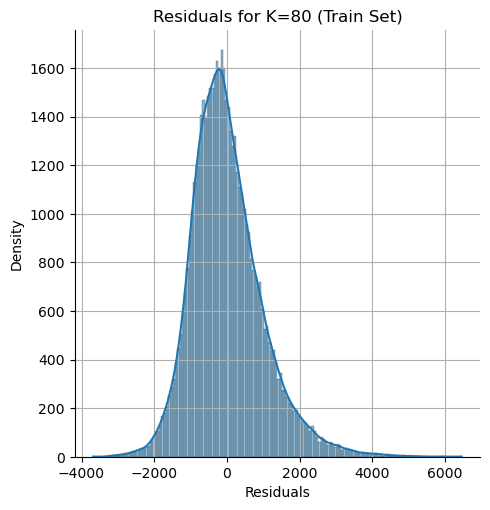

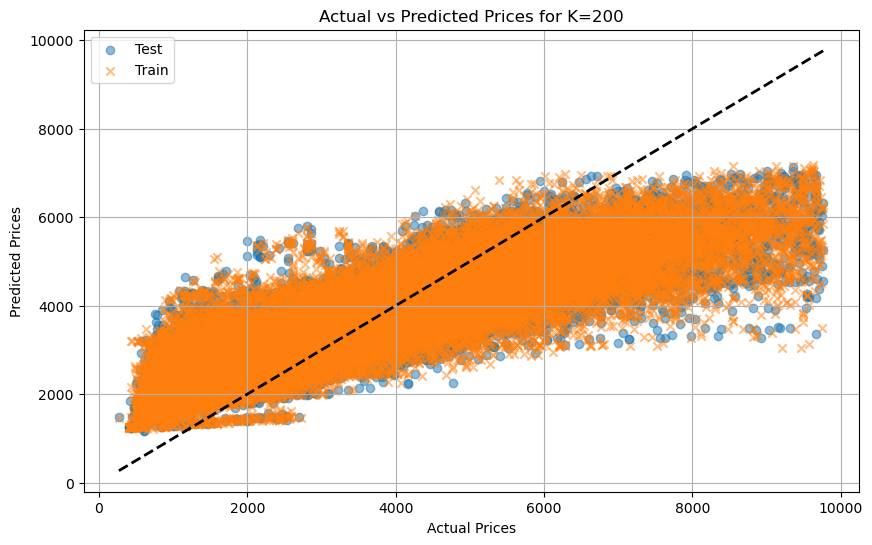

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


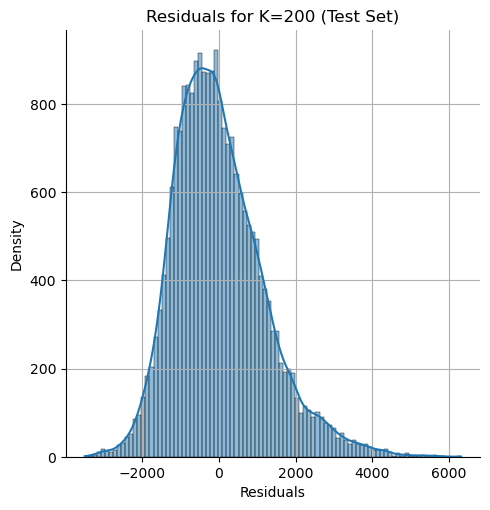

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


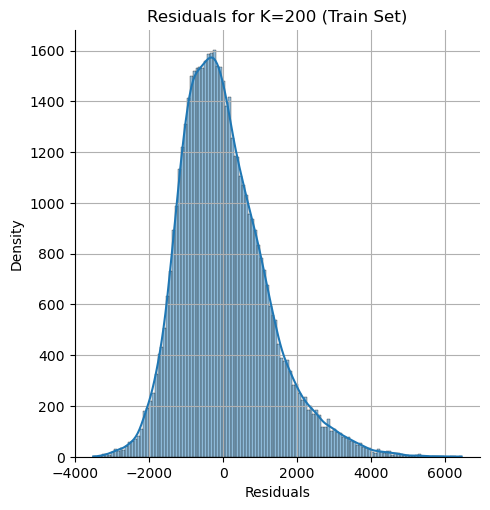

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from datetime import datetime
from collections import Counter
import re

data = pd.read_csv('booking_data.csv')
def convert_to_date(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d')

data['checkin_date'] = data['checkin_date'].apply(convert_to_date)
#data['checkin_day'] = data['checkin_date'].dt.day
data['checkin_month'] = data['checkin_date'].dt.month
o_data = data
# Remove the 'name' column

# Drop non-numeric columns that are not one-hot encoded
data = data.drop(columns=['name','checkout_date', 'Snapshot Date','checkin_date'])
columns_to_normalize = ['distance_from_center', 'num_of_reviews']

standard_scaler = StandardScaler()
data_standard_scaled = data.copy()
data_standard_scaled[columns_to_normalize] = standard_scaler.fit_transform(data[columns_to_normalize])

print("Original Data:")
print(data[columns_to_normalize].head())


print("\nStandard Scaled Data:")
print(data_standard_scaled[columns_to_normalize].head())

X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def evaluate_knn(k_values, X_train, y_train, X_test, y_test):
    results = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        # Evaluate on test set
        y_pred_test = knn.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred_test)
        rmse_test = np.sqrt(mse_test)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)
        
        # Evaluate on train set
        y_pred_train = knn.predict(X_train)
        mse_train = mean_squared_error(y_train, y_pred_train)
        rmse_train = np.sqrt(mse_train)
        mae_train = mean_absolute_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)
        
        results[k] = {
            'test': {'mse': mse_test, 'rmse': rmse_test, 'mae': mae_test, 'r2': r2_test, 'y_pred': y_pred_test},
            'train': {'mse': mse_train, 'rmse': rmse_train, 'mae': mae_train, 'r2': r2_train, 'y_pred': y_pred_train}
        }
    return results

k_values = [1, 3, 5, 10, 15, 20, 80, 200]

results = evaluate_knn(k_values, X_train_scaled, y_train, X_test_scaled, y_test)

results_df_test = pd.DataFrame([(k, res['test']['mse'], res['test']['rmse'], res['test']['mae'], res['test']['r2']) for k, res in results.items()],
                          columns=['K', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2'])

results_df_train = pd.DataFrame([(k, res['train']['mse'], res['train']['rmse'], res['train']['mae'], res['train']['r2']) for k, res in results.items()],
                          columns=['K', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2'])

print("Test Set Results:")
print(results_df_test)

print("Train Set Results:")
print(results_df_train)

# Plot the Mean Squared Error for different values of K for test set
plt.figure(figsize=(10, 6))
plt.plot(results_df_test['K'], results_df_test['Mean Squared Error'], marker='o', label='Test MSE')
plt.plot(results_df_train['K'], results_df_train['Mean Squared Error'], marker='o', label='Train MSE', linestyle='--')
plt.title('KNN Errors for Different K Values')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot scatter plots of actual vs predicted values for each K for both train and test sets
for k in k_values:
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, results[k]['test']['y_pred'], alpha=0.5, label='Test')
    plt.scatter(y_train, results[k]['train']['y_pred'], alpha=0.5, label='Train', marker='x')
    plt.title(f'Actual vs Predicted Prices for K={k}')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot residuals for test set
    residuals_test = y_test - results[k]['test']['y_pred']
    sns.displot(residuals_test, kde=True)
    plt.title(f'Residuals for K={k} (Test Set)')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()
    
    # Plot residuals for train set
    residuals_train = y_train - results[k]['train']['y_pred']
    sns.displot(residuals_train, kde=True)
    plt.title(f'Residuals for K={k} (Train Set)')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()


## Results Analysis

It can be observed that as the value of k decreases, the error becomes smaller, while increasing k leads to a higher error. As is well known for this algorithm, low k values increase the risk of overfitting, since the model becomes highly sensitive to outliers, whereas high k values increase the risk of underfitting, as the model becomes overly generic.

Overall, the algorithm performed quite well, as even when increasing k to 5, the error did not change significantly.

In [2]:
def convert_to_date(date_str):
    return datetime.strptime(date_str, '%Y-%m-%d')

# Adding a feature for the day of the week based on the check-in date
def get_day_of_week(date_obj):
    day_of_week = date_obj.weekday() # Get the day of the week number (0 - Sunday, 1 - Monday, and so on)
    return day_of_week

o_data['checkin_day_week'] = o_data['checkin_date'].apply(get_day_of_week) # Replace the values ​​in the 'bed_type' column with the new classification values

In [3]:
def classify_bed_type(value):
    if value == 7 or value == 8:
        return 1
    else:
        return 0

o_data['two_beds'] = o_data['bed_category'].apply(classify_bed_type)
o_data = o_data.drop(columns=['name','checkout_date', 'Snapshot Date','checkin_date'])


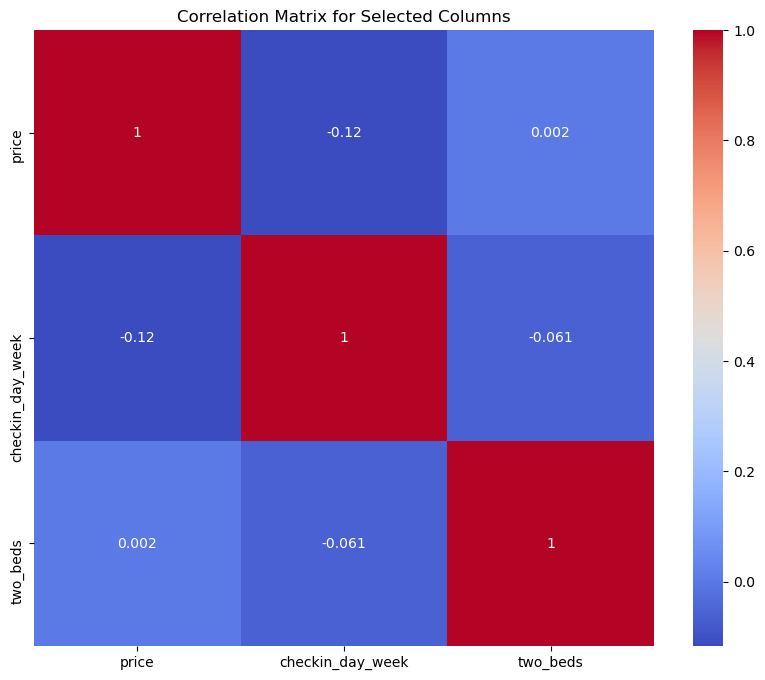

In [4]:
selected_columns = ['price', 'checkin_day_week', 'two_beds']

# Create a new DataFrame with the selected columns
selected_data = o_data[selected_columns]

correlation_matrix = selected_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Columns')
plt.show()

Test Set Results:
     K  Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  \
0    1        4.655866e+05               682.339092           382.780309   
1    3        3.880410e+05               622.929357           424.531499   
2    5        4.148053e+05               644.053790           452.488275   
3   10        4.892857e+05               699.489620           502.219550   
4   15        5.673303e+05               753.213306           544.757262   
5   20        6.360621e+05               797.535042           582.009322   
6   80        1.077928e+06              1038.233082           791.937565   
7  200        1.457893e+06              1207.432244           935.035085   

        R^2  
0  0.884366  
1  0.903625  
2  0.896978  
3  0.878480  
4  0.859096  
5  0.842026  
6  0.732283  
7  0.637914  
Train Set Results:
     K  Mean Squared Error  Root Mean Squared Error  Mean Absolute Error  \
0    1        0.000000e+00                 0.000000             0.000000   


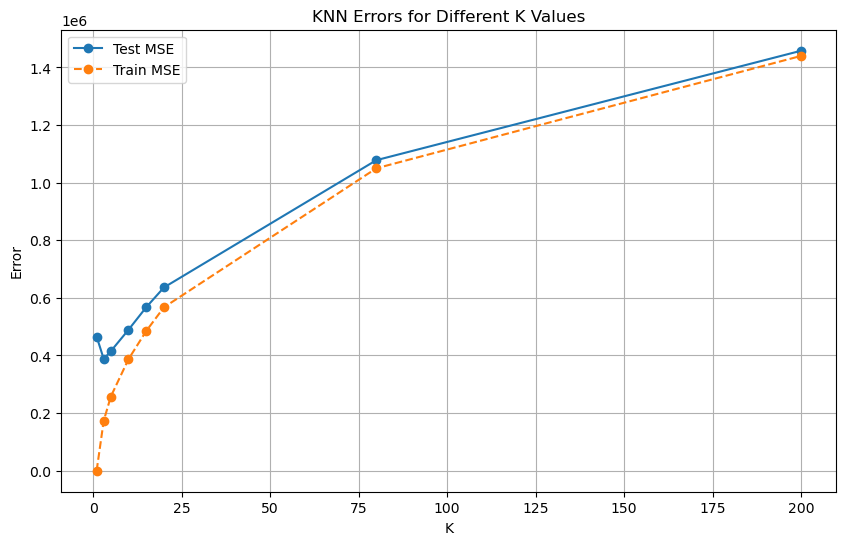

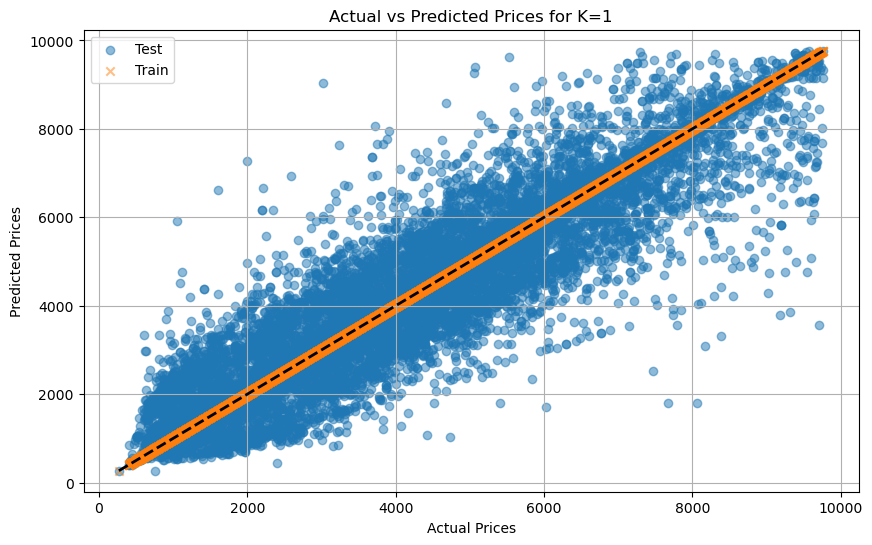

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


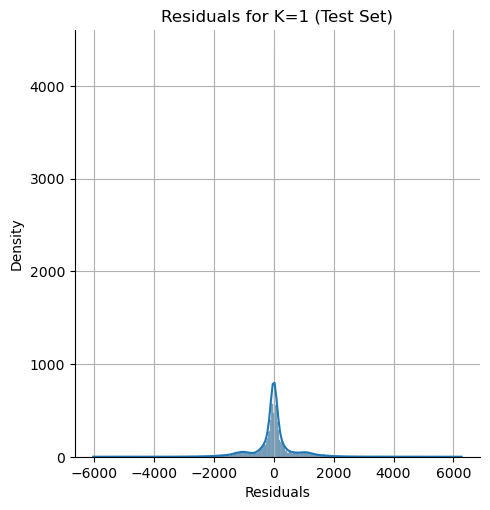

C:\python\Lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


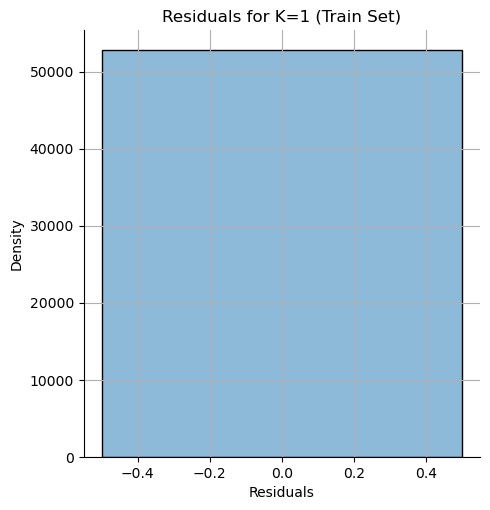

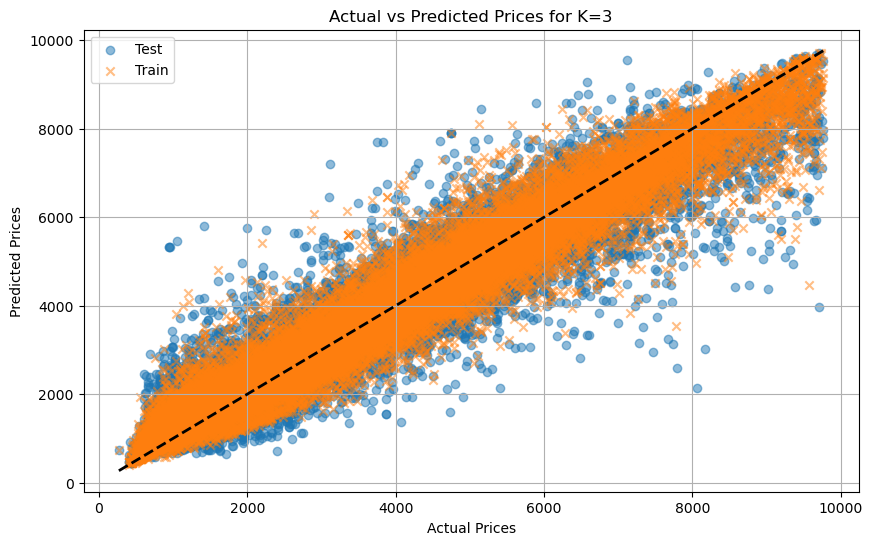

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


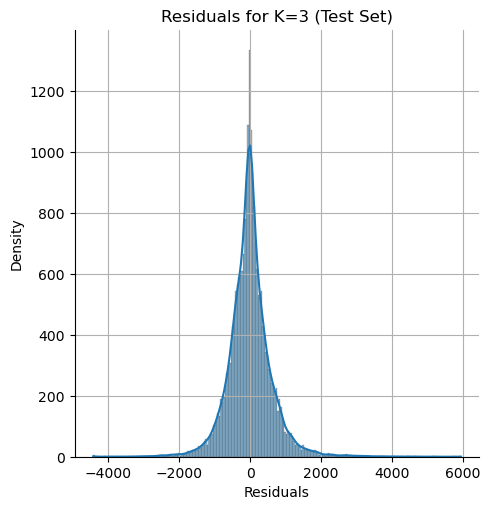

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


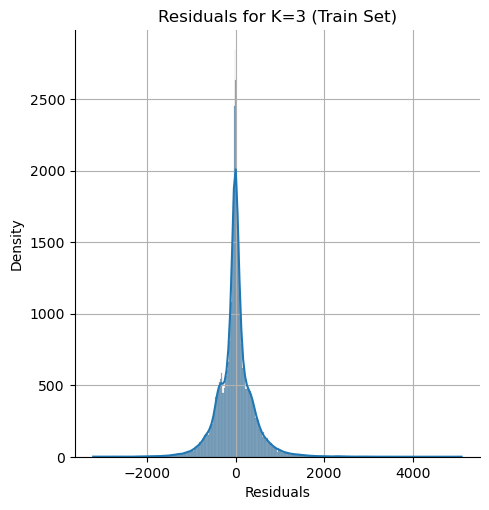

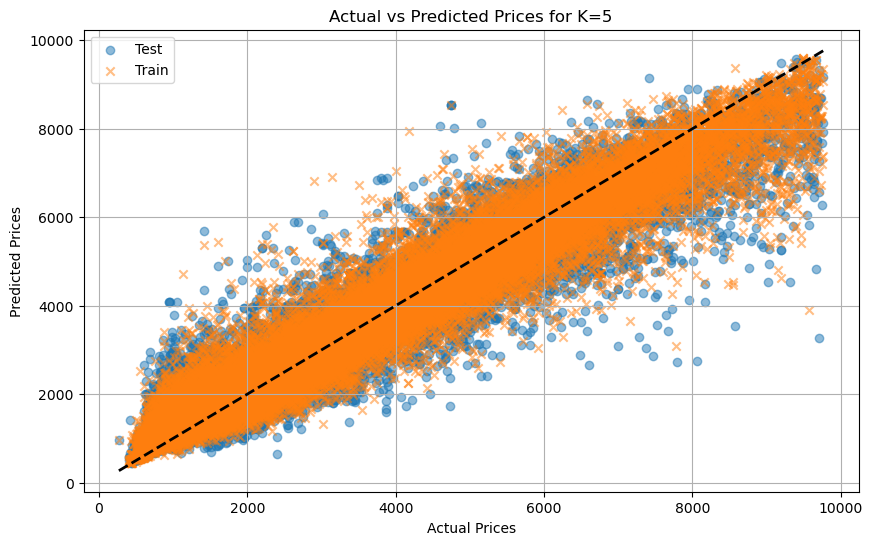

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


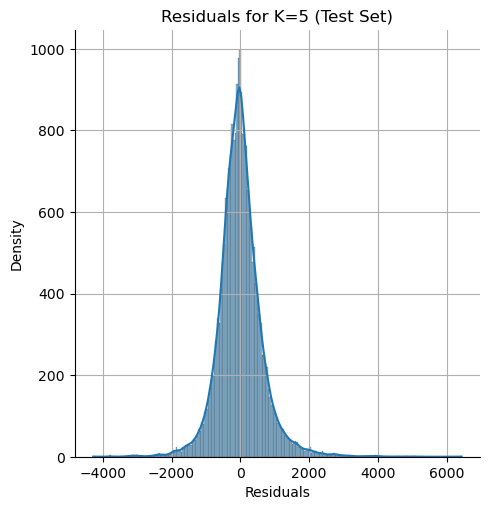

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


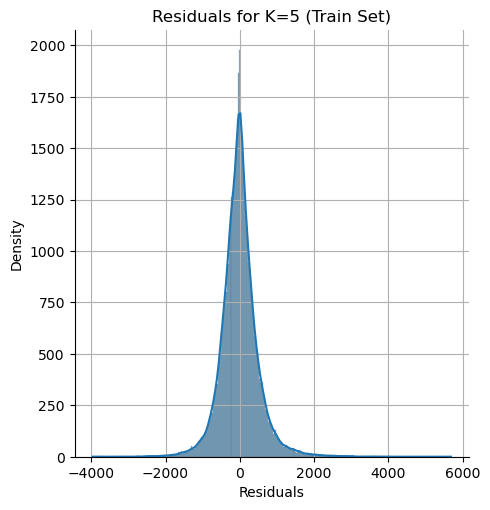

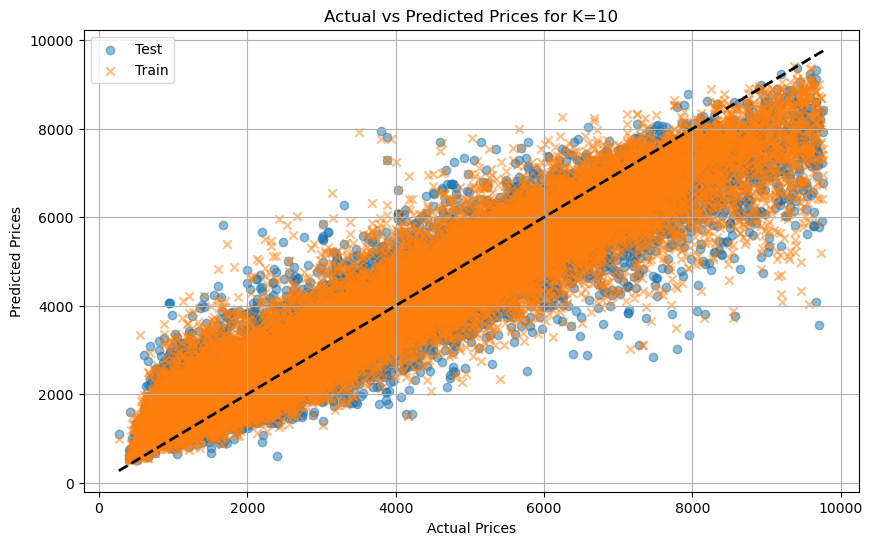

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


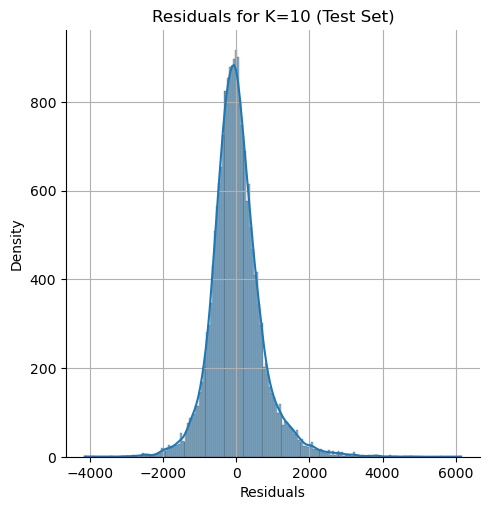

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


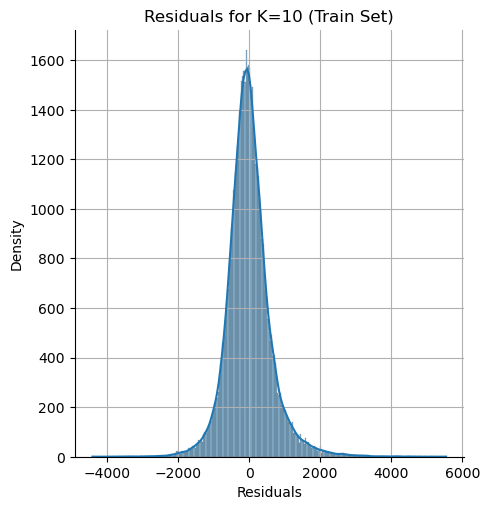

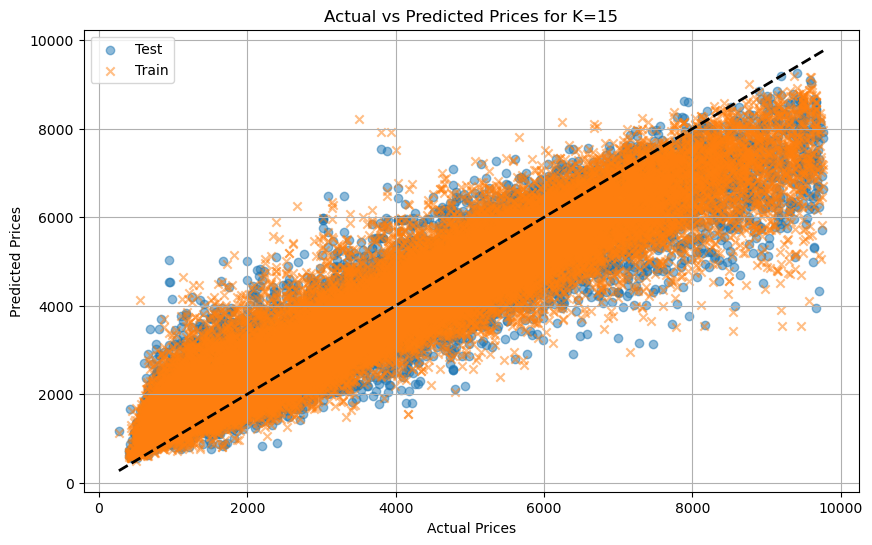

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


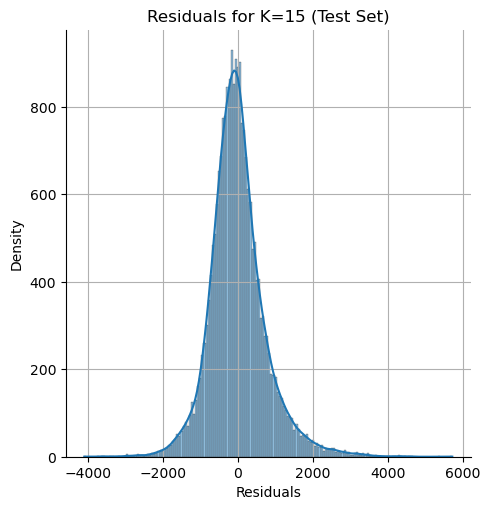

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


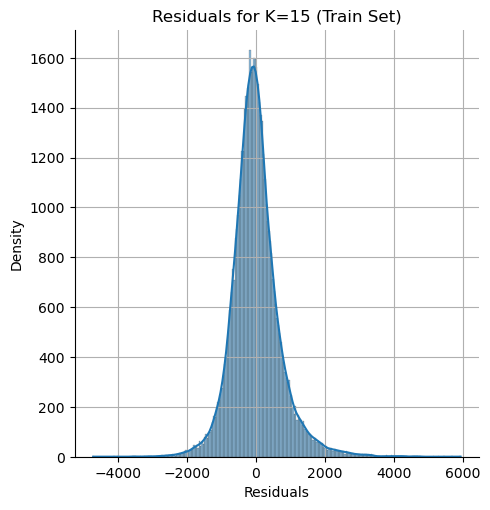

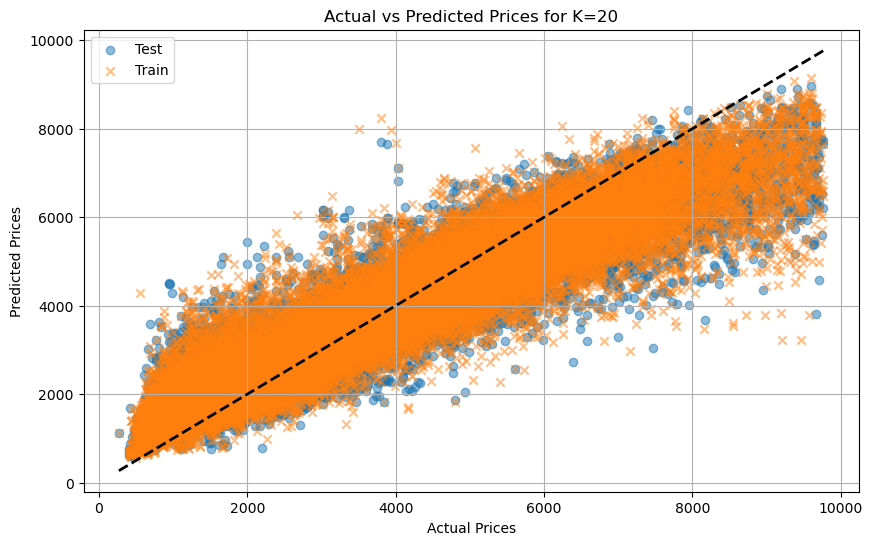

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


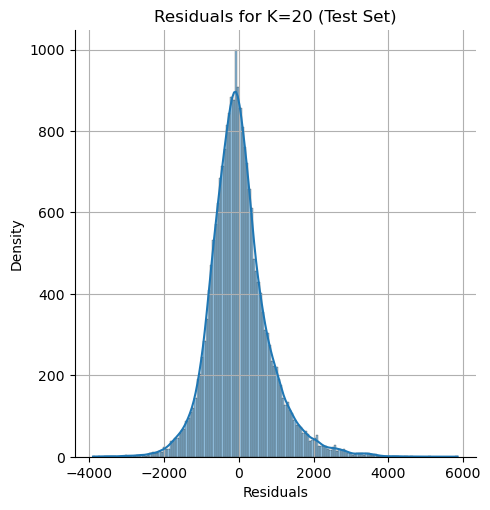

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


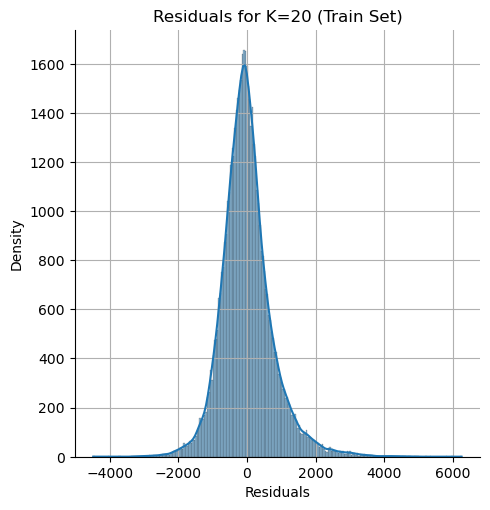

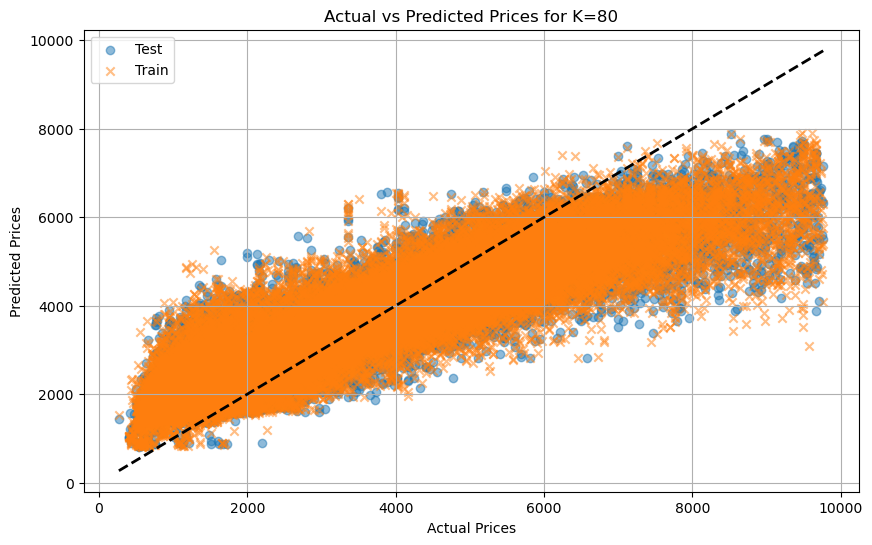

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


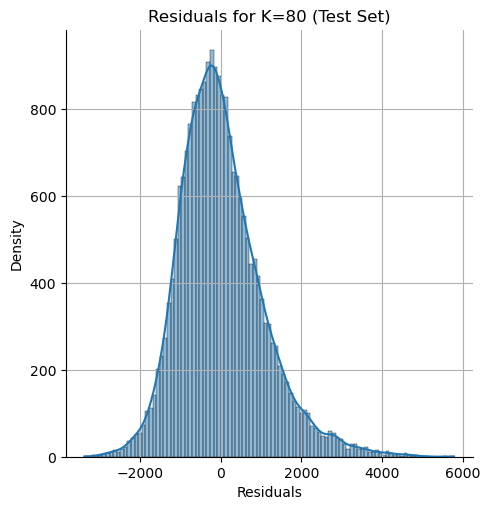

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


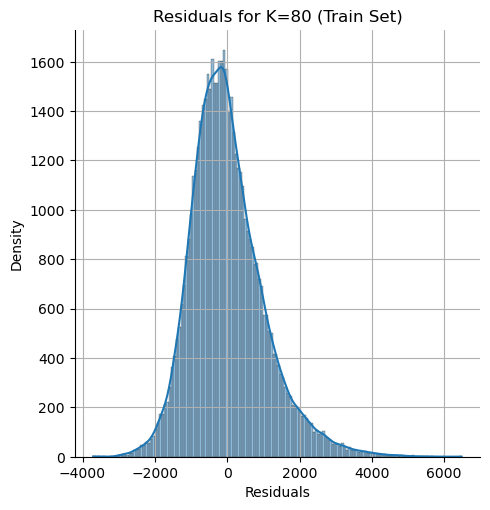

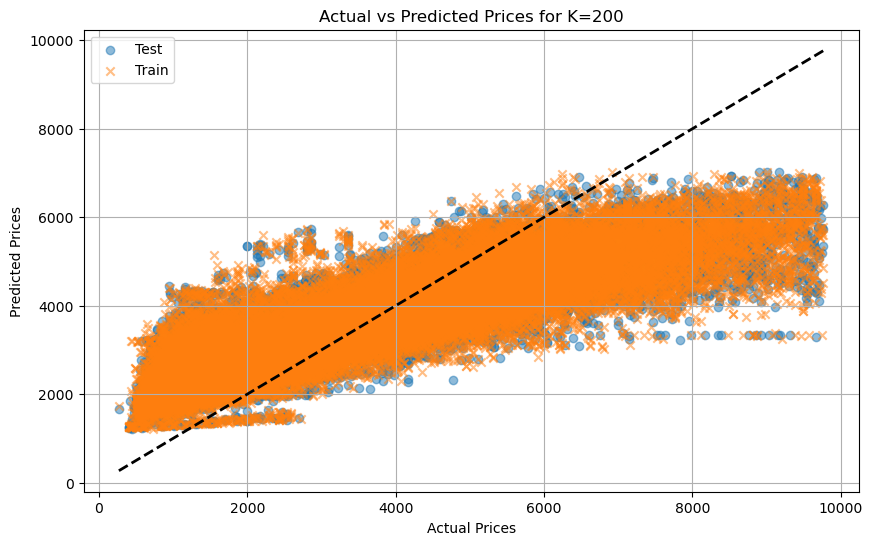

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


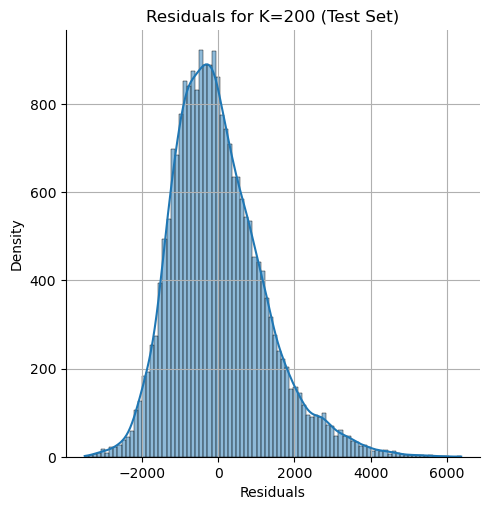

C:\python\Lib\site-packages\seaborn\axisgrid.py:64: UserWarning: The figure layout has changed to tight
  self.fig.tight_layout(*args, **kwargs)


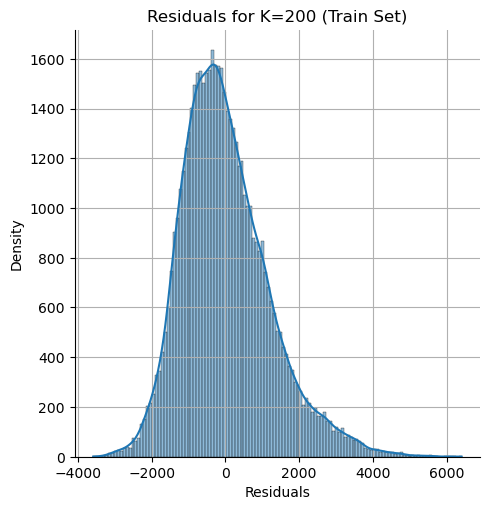

In [5]:
columns_to_normalize = ['distance_from_center', 'num_of_reviews']
standard_scaler = StandardScaler()
o_data_standard_scaled = o_data.copy()
o_data_standard_scaled[columns_to_normalize] = standard_scaler.fit_transform(o_data[columns_to_normalize])
data = o_data


X = data.drop(columns=['price'])
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

def evaluate_knn(k_values, X_train, y_train, X_test, y_test):
    results = {}
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        knn.fit(X_train, y_train)
        
        # Evaluate on test set
        y_pred_test = knn.predict(X_test)
        mse_test = mean_squared_error(y_test, y_pred_test)
        rmse_test = np.sqrt(mse_test)
        mae_test = mean_absolute_error(y_test, y_pred_test)
        r2_test = r2_score(y_test, y_pred_test)
        
        # Evaluate on train set
        y_pred_train = knn.predict(X_train)
        mse_train = mean_squared_error(y_train, y_pred_train)
        rmse_train = np.sqrt(mse_train)
        mae_train = mean_absolute_error(y_train, y_pred_train)
        r2_train = r2_score(y_train, y_pred_train)
        
        results[k] = {
            'test': {'mse': mse_test, 'rmse': rmse_test, 'mae': mae_test, 'r2': r2_test, 'y_pred': y_pred_test},
            'train': {'mse': mse_train, 'rmse': rmse_train, 'mae': mae_train, 'r2': r2_train, 'y_pred': y_pred_train}
        }
    return results

k_values = [1, 3, 5, 10, 15, 20, 80, 200]

results = evaluate_knn(k_values, X_train_scaled, y_train, X_test_scaled, y_test)

results_df_test = pd.DataFrame([(k, res['test']['mse'], res['test']['rmse'], res['test']['mae'], res['test']['r2']) for k, res in results.items()],
                          columns=['K', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2'])

results_df_train = pd.DataFrame([(k, res['train']['mse'], res['train']['rmse'], res['train']['mae'], res['train']['r2']) for k, res in results.items()],
                          columns=['K', 'Mean Squared Error', 'Root Mean Squared Error', 'Mean Absolute Error', 'R^2'])

print("Test Set Results:")
print(results_df_test)

print("Train Set Results:")
print(results_df_train)

# Plot the Mean Squared Error for different values of K for test set
plt.figure(figsize=(10, 6))
plt.plot(results_df_test['K'], results_df_test['Mean Squared Error'], marker='o', label='Test MSE')
plt.plot(results_df_train['K'], results_df_train['Mean Squared Error'], marker='o', label='Train MSE', linestyle='--')
plt.title('KNN Errors for Different K Values')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.grid(True)
plt.show()

# Plot scatter plots of actual vs predicted values for each K for both train and test sets
for k in k_values:
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, results[k]['test']['y_pred'], alpha=0.5, label='Test')
    plt.scatter(y_train, results[k]['train']['y_pred'], alpha=0.5, label='Train', marker='x')
    plt.title(f'Actual vs Predicted Prices for K={k}')
    plt.xlabel('Actual Prices')
    plt.ylabel('Predicted Prices')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    plt.legend()
    plt.grid(True)
    plt.show()

    # Plot residuals for test set
    residuals_test = y_test - results[k]['test']['y_pred']
    sns.displot(residuals_test, kde=True)
    plt.title(f'Residuals for K={k} (Test Set)')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()
    
    # Plot residuals for train set
    residuals_train = y_train - results[k]['train']['y_pred']
    sns.displot(residuals_train, kde=True)
    plt.title(f'Residuals for K={k} (Train Set)')
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.grid(True)
    plt.show()